<a href="https://colab.research.google.com/github/mlotfy/Hijja2/blob/master/Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
#!/usr/bin/env python

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

import tensorflow_datasets as tfds
#import tensorflow_decision_forests as tfdf

tfds.disable_progress_bar()

from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

from tensorflow.keras.optimizers import SGD

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)



print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 tf.keras version:', tf.keras.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')


Using:
	• TensorFlow version: 2.7.0
	• tf.keras version: 2.7.0
	• Running on GPU


In [2]:


#training_set, dataset_info = tfds.load('mnist', split='train', as_supervised = True, with_info = True)

#b_size = 64

train_df=pd.read_csv('https://raw.githubusercontent.com/mlotfy/Hijja2/master/code/data/X_train.csv')
train_df_label=pd.read_csv('https://raw.githubusercontent.com/mlotfy/Hijja2/master/code/data/y_train.csv')

test_df=pd.read_csv('https://raw.githubusercontent.com/mlotfy/Hijja2/master/code/data/X_test.csv')
test_df_label=pd.read_csv('https://raw.githubusercontent.com/mlotfy/Hijja2/master/code/data/y_test.csv')
#training_set = tf.data.experimental.make_csv_dataset('data\X_train.csv',batch_size=b_size)
#dataset_info= tf.data.experimental.make_csv_dataset('data\y_train.csv',batch_size=b_size)


#print(training_set)
#print(dataset_info)
def normalize(image, label):
    image = tf.cast(image, tf.float32)
    image /= 255
    return image, label

#for  labels in ds.take(1):
#    print('The images in the training set have:\n\u2022 ', labels['pixel11'])
num_training_examples = len(train_df)
dataset = tf.data.Dataset.from_tensor_slices((train_df.values.reshape(-1, 32, 32,1), train_df_label.to_numpy()))

num_test_examples = len(test_df)
dataset_test = tf.data.Dataset.from_tensor_slices((test_df.values.reshape(-1, 32, 32,1), test_df_label.to_numpy()))

arabic_characters = ['0','alef أ', 'beh ب', 'teh ت', 'theh ث', 'jeem ج', 'hah ح', 'khah خ', 'dal د', 'thal ذ',
                    'reh ر', 'zain ز', 'seen س', 'sheen ش', 'sad ص', 'dad ض', 'tah ط', 'zah ظ', 'ain ع',
                    'ghain غ', 'feh ف', 'qaf ق', 'kaf ك', 'lam ل', 'meem م', 'noon ن', 'heh هـ', 'waw و', 'yeh ي','hamza ء']

batch_size = 64
#train_dataset = dataset.shuffle(len(train_df)).batch(1)
training_batches = dataset.cache().shuffle(num_training_examples//4).map(normalize).batch(batch_size).prefetch(1)
#training_batches = dataset.shuffle(num_training_examples//4).batch(batch_size).map(normalize).prefetch(1)

testing_batches = dataset.cache().shuffle(num_test_examples//4).map(normalize).batch(batch_size).prefetch(1)
#testing_batches = dataset_test.shuffle(num_test_examples//4).batch(batch_size).map(normalize).prefetch(1)



# New Section

In [3]:
## Solution

layer_neurons = [2048,1024, 512, 256, 128, 56, 48,36, 72,42]
#layer_neurons = [1024, 128, 42]
my_model = tf.keras.Sequential()

my_model.add(tf.keras.layers.Flatten(input_shape = (32, 32, 1)))

#for neurons in layer_neurons:
#    my_model.add(tf.keras.layers.Dense(neurons, activation='relu'))
#    my_model.add(tf.keras.layers.Dropout(0.3))

#my_model.add(Dense(30, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

#my_model.add(activation('linear'))

#my_model.add(tf.keras.layers.Dense(30, activation='softmax'))


my_model = tf.keras.Sequential([
           tf.keras.layers.Flatten(input_shape = (32,32,1)),
           tf.keras.layers.Dense(2048, activation = 'relu'),
           #tf.keras.layers.Dropout(0.4),
           tf.keras.layers.Dense(1024, activation = 'relu'),
           tf.keras.layers.Dense(512, activation = 'relu'),
           #tf.keras.layers.Dropout(0.2),
           tf.keras.layers.Dense(256, activation = 'relu'),
           tf.keras.layers.Dense(128, activation = 'relu'),
           tf.keras.layers.Dense(30, activation = 'softmax')
])

print(my_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 2048)              2099200   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 30)               

In [4]:

my_model.compile(optimizer='Adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])
#sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#my_model.compile(loss='binary_crossentropy',
#              optimizer=sgd,
#              metrics=['accuracy'])


#for image_batch, label_batch in training_batches.take(1):
#    loss, accuracy = my_model.evaluate(image_batch, label_batch)

#print('\nLoss before training: {:,.3f}'.format(loss))
#print('Accuracy before training: {:.3%}'.format(accuracy))


EPOCHS = 200

early_stop=tf.keras.callbacks.EarlyStopping(
    monitor='loss', patience=5, 
 
)


history = my_model.fit(training_batches, epochs = EPOCHS, callbacks=[early_stop])


Epoch 1/200
593/593 [==============================] - 7s 8ms/step - loss: 2.2930 - accuracy: 0.3089
Epoch 2/200
593/593 [==============================] - 5s 8ms/step - loss: 1.5233 - accuracy: 0.5078
Epoch 3/200
593/593 [==============================] - 5s 8ms/step - loss: 1.1504 - accuracy: 0.6233
Epoch 4/200
593/593 [==============================] - 5s 8ms/step - loss: 0.9173 - accuracy: 0.6949
Epoch 5/200
593/593 [==============================] - 5s 8ms/step - loss: 0.7445 - accuracy: 0.7529
Epoch 6/200
593/593 [==============================] - 5s 8ms/step - loss: 0.5908 - accuracy: 0.8027
Epoch 7/200
593/593 [==============================] - 5s 8ms/step - loss: 0.4830 - accuracy: 0.8397
Epoch 8/200
593/593 [==============================] - 5s 8ms/step - loss: 0.4041 - accuracy: 0.8676
Epoch 9/200
593/593 [==============================] - 5s 8ms/step - loss: 0.3387 - accuracy: 0.8887
Epoch 10/200
593/593 [==============================] - 5s 8ms/step - loss: 0.2827 - accura

2/2 [==============================] - 0s 9ms/step - loss: 0.3854 - accuracy: 0.9062

Loss after training: 0.385
Accuracy after training: 90.625%
2/2 [==============================] - 0s 9ms/step - loss: 0.0632 - accuracy: 0.9844

Loss  Testing: 0.063
Accuracy  Testing: 98.438%


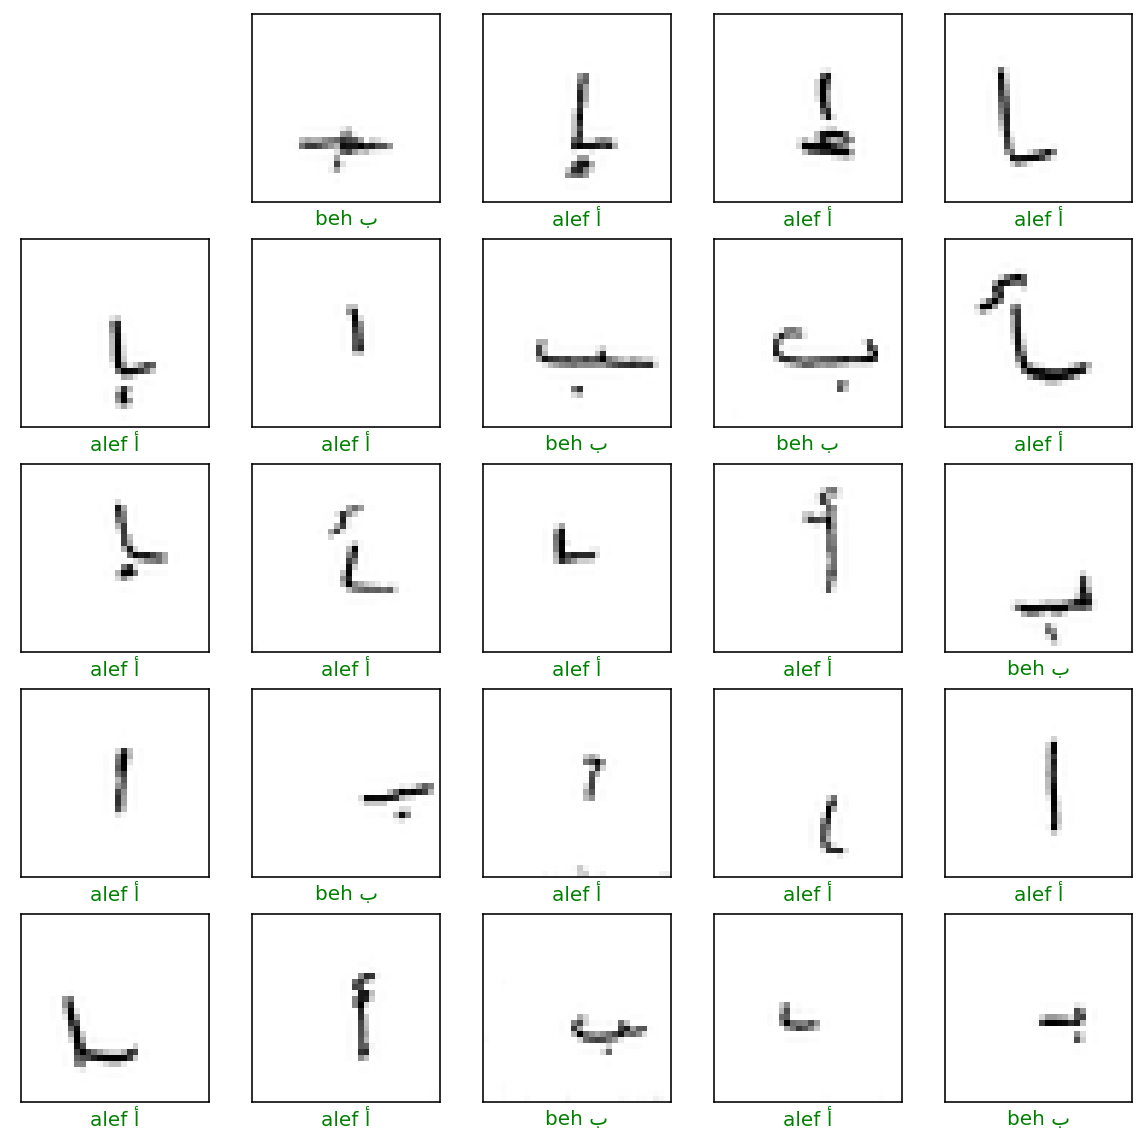

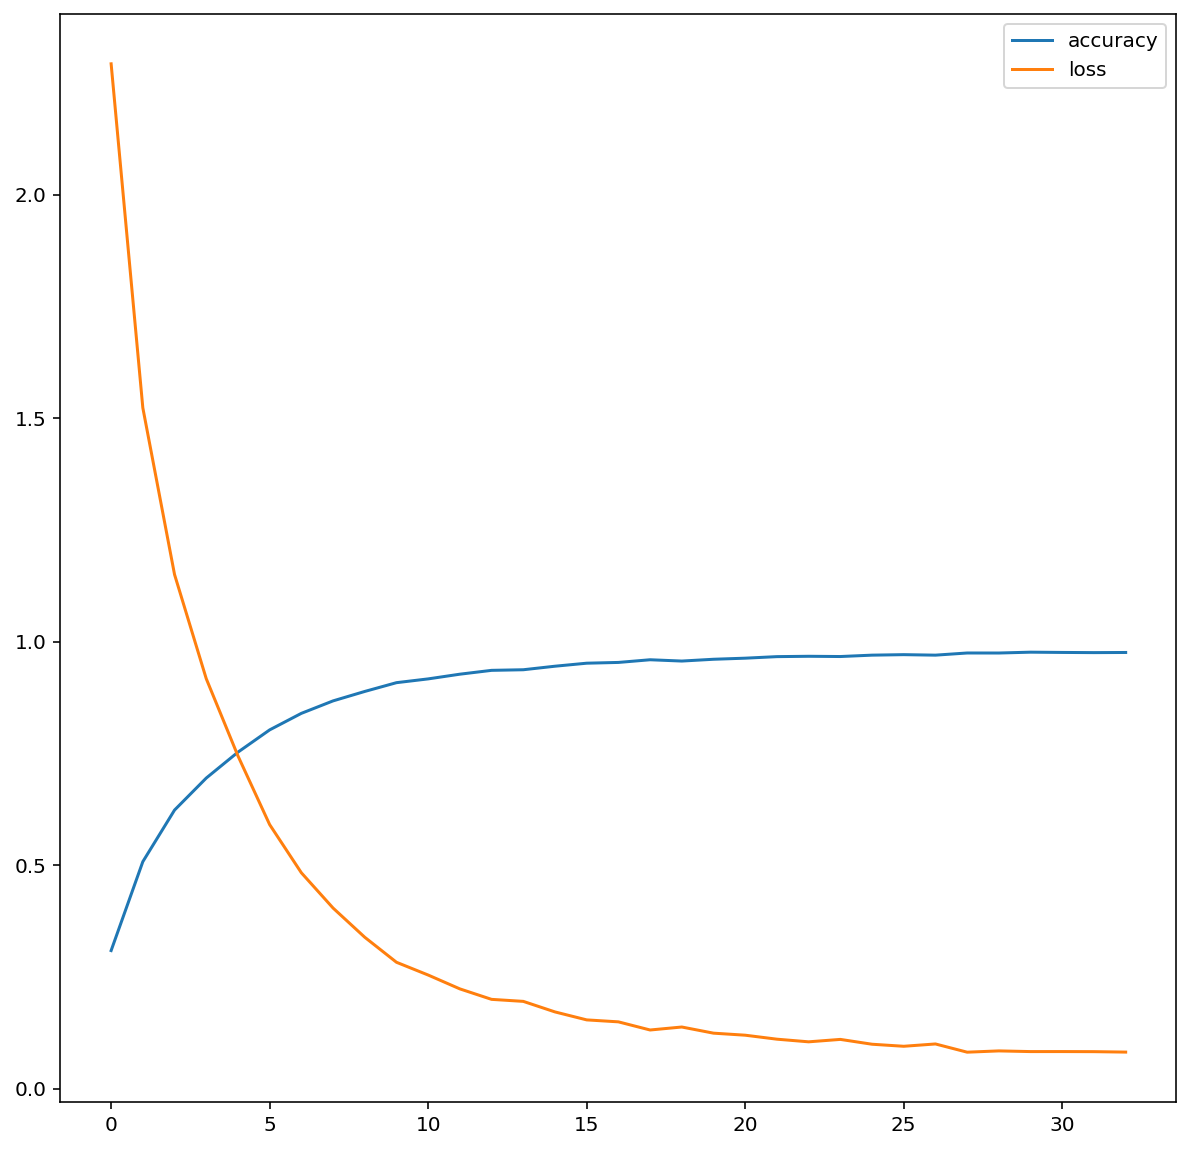

In [5]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

for image_batch, label_batch in training_batches.take(1):
    loss, accuracy = my_model.evaluate(image_batch, label_batch)

print('\nLoss after training: {:,.3f}'.format(loss))
print('Accuracy after training: {:.3%}'.format(accuracy))

for image_batch, label_batch in testing_batches.take(1):
    loss, accuracy = my_model.evaluate(image_batch, label_batch)

print('\nLoss  Testing: {:,.3f}'.format(loss))
print('Accuracy  Testing: {:.3%}'.format(accuracy))

plt.figure(figsize=(10,10))
i=0
for image_batch, label_batch in testing_batches.take(24):
    ps = my_model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[0]
    i+=1
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(first_image, cmap = plt.cm.binary)
    color = 'green' if np.argmax(ps[0]) == label_batch.numpy().squeeze()[0] else 'red'
    plt.xlabel(arabic_characters[np.argmax(ps[0])], color=color)
    #plt.title(arabic_characters[np.argmax(ps[0])], color=color)
    #plt.xlabel( 'Actual -> ' + arabic_characters[label_batch.numpy().squeeze()[0]])
plt.show()


plt.figure(figsize=(10,10))
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.legend(["accuracy","loss"])
plt.show()



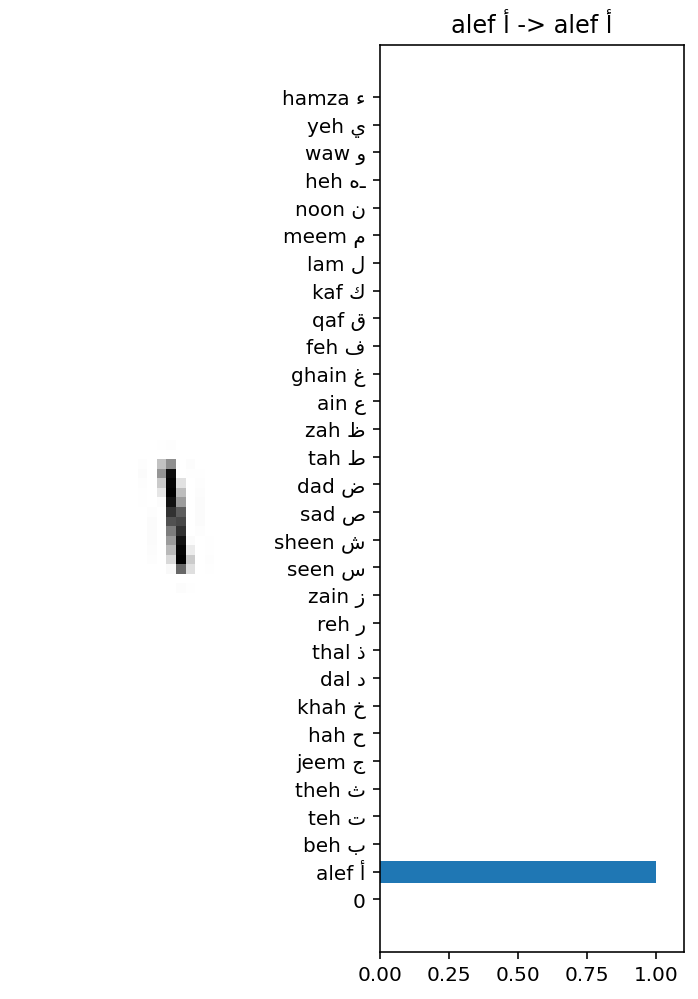

In [6]:
## Solution

for image_batch, label_batch in testing_batches.take(1):
    ps = my_model.predict(image_batch)
    first_image = image_batch.numpy().squeeze()[0]
    
    
    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(first_image, cmap = plt.cm.binary)
    ax1.axis('off')
    ax2.barh(np.arange(30), ps[0])
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(30))
    ax2.set_yticklabels(arabic_characters)
    ax2.set_title('Class Probability')
    plt.title(arabic_characters[np.argmax(ps[0])]  +  ' -> ' + arabic_characters[label_batch.numpy().squeeze()[0]])
    ax2.set_xlim(0, 1.1)
    #plt.tight_layout()

plt.show()

In [7]:


train_df = train_df.astype(float)
test_df = test_df.astype(float)
train_df/=255
test_df /=255

y_train_pred = my_model.predict(train_df.values.reshape(-1, 32, 32,1))
y_test_pred = my_model.predict(test_df.values.reshape(-1, 32, 32,1))

mse_train = ((y_train_pred - train_df_label.values) ** 2).mean()
mse_test = ((y_test_pred - test_df_label.values) ** 2).mean()
print("\nSecond Opinion loss: %5.4f - val_loss: %5.4f" % (mse_train, mse_test))

my_model.save('./test_model5.h5')


Second Opinion loss: 291.8365 - val_loss: 291.7987
